In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_df = pd.read_csv(f"C:\\Users\\johnh\\OneDrive\\Documents\\공부\\2023년\\인공지능프로젝트\\기말프로젝트\\final_data\\\data_by_all_20230518.csv",
                      header=0)

In [3]:
data_df.head(5)
data_df.columns

Index(['ID', 'fertilizer_price_index_all', 'fertilizer_price_index_nitrogen',
       'fertilizer_price_index_phosphate', 'oil_price',
       'meat_total(kg/capita)', 'meat_total_us(lb/capita)',
       'fruits(kg/capita)', 'vegetable(kg/capita)', 'coffee_us(gal/capita)',
       'tea_us(gal/capita)', 'cocoa_us(lb/capita)', 'co2(ppm)',
       'population_us_total', 'population_us_asian', 'population_world',
       'population_asia_all', 'population_asia_east&southeast', 'cpi_us',
       'gini_us', 'harvestedarea_rice_asia(ha)', 'yield_rice_asia(hg/ha)',
       'production_rice_asia(ton)', 'food_consumption_us(kcal)',
       'crop_price_us'],
      dtype='object')

### 미국 음식 소비량 시각화

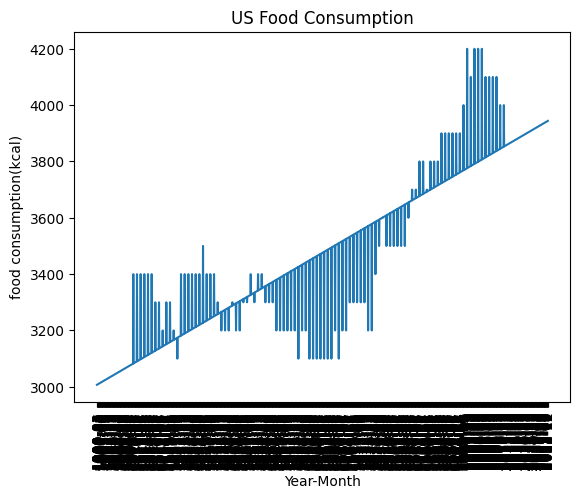

In [4]:
x = list(data_df['ID'])
y = list(data_df['food_consumption_us(kcal)'])

# 그래프 생성
plt.plot(x, y)

# X축 레이블 및 기울기 설정
plt.xticks(rotation=90)
plt.xlabel('Year-Month')

# Y축 레이블 설정
plt.ylabel('food consumption(kcal)')

# 그래프 제목 설정
plt.title('US Food Consumption')

# 그래프 출력
plt.show()

### Food Consumption과 다른 Feature과의 상관관계 확인

In [6]:
temp_data=data_df.loc[:, ['fertilizer_price_index_all', 'fertilizer_price_index_nitrogen',
       'fertilizer_price_index_phosphate', 'oil_price',
       'meat_total(kg/capita)', 'meat_total_us(lb/capita)',
       'fruits(kg/capita)', 'vegetable(kg/capita)', 'coffee_us(gal/capita)',
       'tea_us(gal/capita)', 'cocoa_us(lb/capita)', 'co2(ppm)',
        'cpi_us','population_us_asian',
       'gini_us', 'harvestedarea_rice_asia(ha)', 'yield_rice_asia(hg/ha)',
       'production_rice_asia(ton)', 'food_consumption_us(kcal)',
       'crop_price_us']]
temp_data.corr()['food_consumption_us(kcal)'].sort_values(ascending=False)

food_consumption_us(kcal)           1.000000
gini_us                             0.978710
harvestedarea_rice_asia(ha)         0.977815
co2(ppm)                            0.974447
meat_total(kg/capita)               0.974092
vegetable(kg/capita)                0.967266
fruits(kg/capita)                   0.964004
yield_rice_asia(hg/ha)              0.963013
meat_total_us(lb/capita)            0.929955
production_rice_asia(ton)           0.920794
crop_price_us                       0.897818
cpi_us                              0.891115
cocoa_us(lb/capita)                 0.845409
population_us_asian                 0.835159
fertilizer_price_index_all          0.823886
fertilizer_price_index_phosphate    0.804590
fertilizer_price_index_nitrogen     0.782858
oil_price                           0.737713
tea_us(gal/capita)                  0.070707
coffee_us(gal/capita)              -0.319963
Name: food_consumption_us(kcal), dtype: float64

### ARIMA 통계 모델(AutoRegressive Integrated Moving Average)을 사용한 시계열 예측

- ARIMA : 시계열 데이터를 분석하고 예측하기 위해 사용, 자기회귀(Auto Regressive), 누적 차분(Integrated), 이동 평균(Moving Average) 세가지 요소를 결합한 모델로 통계적 모델.
- CPI에 Outlier가 없고, 추세가 중요해보임, 장기적인 예측도 할 필요가 없이 앞으로 1~2년 데이터에 대한 예측만을 필요로 하므로 ARIMA를 사용해봄.

---
- p, q : 자기상관 함수, 부분자기상관 함수 - 통계적으로 유의한 시차에서 감소되는 패턴을 파악하여 p, q 값을 설정. 여기서는 p=2, q=0으로 설정하여 자기 상관함수만 값을 줬음. q 값은 이전 예측 오차들의 선형 조합 예측이므로 0을 줘 값을 넣지 않았음. p는 자기 회귀 값을 선형 조합으로 예측하는 값이기 때문에 2를 넣어서 가장 크게 반영 함.
- d : 차분(Differencing) - 시계열 데이터를 정상 시계열로 변환하기 위한 차분(Differencing) 횟수를 의미. 시계열 데이터가 정상성을 가지지 않을 때, 차분을 통해 추세나 계절성 요소를 제거하고 정상성을 확보. d=1로 설정함. cpi data에는 outlier가 거의 없기 때문에 1의 값을 줌.

In [7]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\johnh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\johnh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\johnh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2023-01-01    3934.423511
2023-02-01    3935.734804
2023-03-01    3935.707242
2023-04-01    3936.970272
2023-05-01    3935.530083
2023-06-01    3936.781896
2023-07-01    3935.559734
2023-08-01    3936.805268
2023-09-01    3935.560138
2023-10-01    3936.797195
2023-11-01    3935.564635
2023-12-01    3936.793823
Freq: MS, Name: predicted_mean, dtype: float64


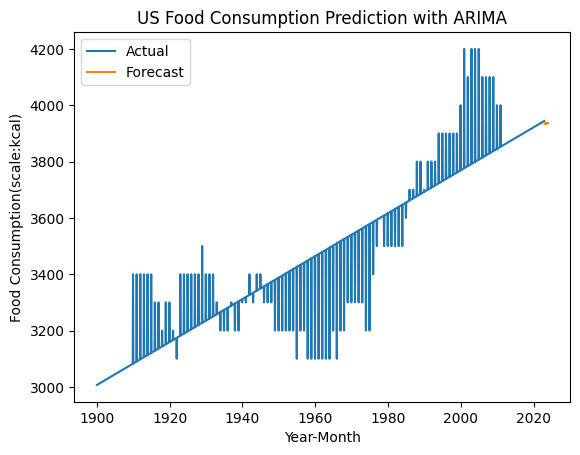

In [11]:
# 데이터 불러오기
data_arima = data_df.loc[:, ['ID', 'food_consumption_us(kcal)']]

data_arima['ID'] = pd.to_datetime(data_arima['ID'], format='%Y-%m') 
data_arima.set_index('ID', inplace=True)  # 날짜 열을 인덱스로 설정
pop_data = data_arima['food_consumption_us(kcal)']

p, d, q = 3, 1, 2
# ARIMA 모델 학습
model = ARIMA(pop_data, order=(p, d, q))
model_fit = model.fit()

# 미래 예측
future_periods = 12 # 미래의 몇 개월까지 예측할 것인지 설정
forecast = model_fit.forecast(steps=future_periods)

# 예측 결과 출력
print(forecast)

# 그래프로 시각화
plt.plot(data_arima, label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Food Consumption(scale:kcal)')
plt.title('US Food Consumption Prediction with ARIMA')
plt.legend()
plt.show()

### LSTM 모델을 이용한 CPI 지수 예측

- 연-월을 Input으로 넣고 CPI 지수를 target value로 설정
- sequence length를 8로 설정하여 추세를 그리도록 하였음. 이번에는 2년치의 데이터를 참고했을 때 오히려 긴 경향성에 따라 인구수가 매우 빠르게 증가하는 경향을 관찰 할 수 있었음. 8개월로 설정하여 적당한 값의 인구 수를 예측할 수 있도록 함.

In [4]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [5]:
# 데이터 불러오기
data_lstm = data_df.loc[:, ['ID', 'food_consumption_us(kcal)']]

data_lstm['ID'] = pd.to_datetime(data_lstm['ID'], format='%Y-%m') 
data_lstm.set_index('ID', inplace=True)  # 날짜 열을 인덱스로 설정
food_consume_data = data_lstm['food_consumption_us(kcal)']

In [6]:
scaler = MinMaxScaler()  # 데이터 스케일링을 위한 scaler 객체 생성
scaled_data = scaler.fit_transform(food_consume_data.values.reshape(-1, 1))  # 데이터 스케일링 적용

In [7]:
# 시퀀스 데이터 생성
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return torch.tensor(X).float(), torch.tensor(y).float()

In [8]:
# 전체 데이터셋을 학습시킴

sequence_length = 8 # 시퀀스 길이 설정
X_train, y_train = create_sequences(scaled_data, sequence_length)

C:\Users\johnh\AppData\Local\Temp\ipykernel_32904\1573376001.py:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  return torch.tensor(X).float(), torch.tensor(y).float()


In [9]:
# LSTM 모델 구성
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        output, _ = self.lstm(x)
        output = output[:, -1, :]
        output = self.fc(output)
        return output

In [10]:
input_size = 1
hidden_size = 64
output_size = 1

model = LSTMModel(input_size, hidden_size, output_size)

# 모델 학습
learning_rate = 0.001
num_epochs = 200

In [11]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

Epoch [10/200], Loss: 0.067253
Epoch [20/200], Loss: 0.046057
Epoch [30/200], Loss: 0.035367
Epoch [40/200], Loss: 0.029474
Epoch [50/200], Loss: 0.020761
Epoch [60/200], Loss: 0.009579
Epoch [70/200], Loss: 0.003985
Epoch [80/200], Loss: 0.004528
Epoch [90/200], Loss: 0.003680
Epoch [100/200], Loss: 0.003653
Epoch [110/200], Loss: 0.003437
Epoch [120/200], Loss: 0.003336
Epoch [130/200], Loss: 0.003217
Epoch [140/200], Loss: 0.003118
Epoch [150/200], Loss: 0.003030
Epoch [160/200], Loss: 0.002953
Epoch [170/200], Loss: 0.002890
Epoch [180/200], Loss: 0.002840
Epoch [190/200], Loss: 0.002802
Epoch [200/200], Loss: 0.002776


In [13]:
# 테스트 데이터 생성 2023-01 부터 2023-12 까지.
test_dates = pd.date_range(start='2023-01', end='2032-12', freq='MS')
print(test_dates)

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01',
               ...
               '2032-03-01', '2032-04-01', '2032-05-01', '2032-06-01',
               '2032-07-01', '2032-08-01', '2032-09-01', '2032-10-01',
               '2032-11-01', '2032-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS')


In [14]:
# 테스트 데이터 예측
with torch.no_grad():
    test_inputs = torch.tensor(scaled_data[-sequence_length:]).unsqueeze(0).float()
    predicted = []
    
    for _ in range(len(test_dates)):
        output = model(test_inputs)
        predicted.append(output.item())
        
        test_inputs = torch.cat((test_inputs[:, 1:, :], output.unsqueeze(0)), dim=1)

In [15]:
# 예측 결과 출력
predicted = scaler.inverse_transform(np.array(predicted).reshape(-1, 1)).flatten()

for date, prediction in zip(test_dates, predicted):
    print(f'{date.strftime("%Y-%m")}: {prediction:.2f}')

2023-01: 3949.57
2023-02: 3950.73
2023-03: 3952.01
2023-04: 3953.42
2023-05: 3954.95
2023-06: 3956.60
2023-07: 3958.37
2023-08: 3960.25
2023-09: 3962.23
2023-10: 3963.82
2023-11: 3965.47
2023-12: 3967.16
2024-01: 3968.90
2024-02: 3970.65
2024-03: 3972.41
2024-04: 3974.17
2024-05: 3975.91
2024-06: 3977.62
2024-07: 3979.35
2024-08: 3981.09
2024-09: 3982.84
2024-10: 3984.58
2024-11: 3986.32
2024-12: 3988.06
2025-01: 3989.80
2025-02: 3991.53
2025-03: 3993.27
2025-04: 3995.00
2025-05: 3996.74
2025-06: 3998.47
2025-07: 4000.20
2025-08: 4001.93
2025-09: 4003.65
2025-10: 4005.38
2025-11: 4007.10
2025-12: 4008.82
2026-01: 4010.53
2026-02: 4012.25
2026-03: 4013.96
2026-04: 4015.67
2026-05: 4017.37
2026-06: 4019.07
2026-07: 4020.77
2026-08: 4022.46
2026-09: 4024.15
2026-10: 4025.83
2026-11: 4027.51
2026-12: 4029.18
2027-01: 4030.85
2027-02: 4032.52
2027-03: 4034.18
2027-04: 4035.83
2027-05: 4037.48
2027-06: 4039.13
2027-07: 4040.76
2027-08: 4042.39
2027-09: 4044.02
2027-10: 4045.64
2027-11: 4047.

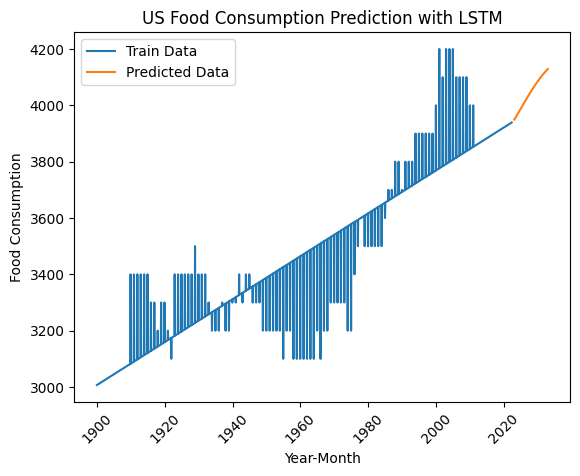

In [16]:
# 학습 데이터와 예측 결과 시각화
train_dates = data_lstm.index[:-sequence_length]

plt.plot(train_dates, food_consume_data[:-sequence_length], label='Train Data')
plt.plot(test_dates, predicted, label='Predicted Data')
plt.xlabel('Year-Month')
plt.ylabel('Food Consumption')
plt.title('US Food Consumption Prediction with LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.show()